In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline

In [2]:
df_greenbonds = pd.read_csv("./data/Green_Bonds_since_2008.csv")
df_greenbonds.shape

(115, 10)

In [3]:
df_greenbonds.head()

,Type,Maturity,Currency,Volume,Coupon,Settlement Date,Maturity Date,USD Equivalent,ISIN,Final Terms
0,Green,5,INR,80000000,0.04500,04/05/2018 12:00:00 AM,03/24/2023 12:00:00 AM,1230000,XS1801822419,NaN
1,Green,5,INR,80000000,0.04050,11/28/2017 12:00:00 AM,11/28/2022 12:00:00 AM,1230000,XS1724511958,NaN
2,Green,5,INR,1608700000,0.05000,09/27/2017 12:00:00 AM,NaN,25100000,XS1687324068,http://pubdocs.worldbank.org/en/20621154455317...
3,Green,3,MYR,65000000,0.02950,03/13/2017 12:00:00 AM,03/13/2020 12:00:00 AM,14620000,XS1576723552,http://pubdocs.worldbank.org/en/30221154455317...
4,Green,3,USD,100000000,0.01181,11/14/2016 12:00:00 AM,12/15/2019 12:00:00 AM,100000000,XS1517268105,NaN


In [4]:
df_fx = pd.read_csv('./data/ECB_FX_USD-quote.csv')
df_fx.shape

(5464, 34)

In [5]:
df_fx['Date'].max()

'2020-05-07'

In [6]:
fx_latest = df_fx[df_fx.Date == df_fx['Date'].max()]
fx_latest.head()

,Date,EUR,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,...,ILS,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
1,2020-05-07,1.0783,0.009383865633974415,0.5513344922793741,0.03970469106708888,0.14453454862274648,1.2326527812707195,0.0030865010304556902,0.23716101788110056,0.2235513631180678,...,0.28465457617275153,0.013187229801207066,0.0008167825599539457,0.04136536786904867,0.23124101992236926,0.6051066217732884,0.01978641026111529,0.7046330784813436,0.03083588321084389,0.053727491056213814


In [20]:
df_fxt = fx_latest.transpose()
df_fxt.columns.name = 'Currency'
df_fxt.columns = ['Currency_Value']
df_fxt.head(10)

,Currency_Value
Date,2020-05-07
EUR,1.0783
JPY,0.009383865633974415
BGN,0.5513344922793741
CZK,0.03970469106708888
DKK,0.14453454862274648
GBP,1.2326527812707195
HUF,0.0030865010304556902
PLN,0.23716101788110056
RON,0.2235513631180678


In [21]:
df_fxt2 = df_fxt.drop('Date')
df_fxt2 = df_fxt2.reindex()
df_fxt2.head()

,Currency_Value
EUR,1.0783
JPY,0.009383865633974415
BGN,0.5513344922793741
CZK,0.03970469106708888
DKK,0.14453454862274648


In [23]:
df_gb = df_greenbonds.merge(df_fxt2, how='left', left_on='Currency', right_index=True)
df_gb.head()

,Type,Maturity,Currency,Volume,Coupon,Settlement Date,Maturity Date,USD Equivalent,ISIN,Final Terms,Currency_Value
0,Green,5,INR,80000000,0.04500,04/05/2018 12:00:00 AM,03/24/2023 12:00:00 AM,1230000,XS1801822419,NaN,0.013187229801207066
1,Green,5,INR,80000000,0.04050,11/28/2017 12:00:00 AM,11/28/2022 12:00:00 AM,1230000,XS1724511958,NaN,0.013187229801207066
2,Green,5,INR,1608700000,0.05000,09/27/2017 12:00:00 AM,NaN,25100000,XS1687324068,http://pubdocs.worldbank.org/en/20621154455317...,0.013187229801207066
3,Green,3,MYR,65000000,0.02950,03/13/2017 12:00:00 AM,03/13/2020 12:00:00 AM,14620000,XS1576723552,http://pubdocs.worldbank.org/en/30221154455317...,0.23124101992236926
4,Green,3,USD,100000000,0.01181,11/14/2016 12:00:00 AM,12/15/2019 12:00:00 AM,100000000,XS1517268105,NaN,NaN


In [25]:
df_gb['Currency_Value'].fillna(1, inplace=True)
df_gb.head()

,Type,Maturity,Currency,Volume,Coupon,Settlement Date,Maturity Date,USD Equivalent,ISIN,Final Terms,Currency_Value
0,Green,5,INR,80000000,0.04500,04/05/2018 12:00:00 AM,03/24/2023 12:00:00 AM,1230000,XS1801822419,NaN,0.013187229801207066
1,Green,5,INR,80000000,0.04050,11/28/2017 12:00:00 AM,11/28/2022 12:00:00 AM,1230000,XS1724511958,NaN,0.013187229801207066
2,Green,5,INR,1608700000,0.05000,09/27/2017 12:00:00 AM,NaN,25100000,XS1687324068,http://pubdocs.worldbank.org/en/20621154455317...,0.013187229801207066
3,Green,3,MYR,65000000,0.02950,03/13/2017 12:00:00 AM,03/13/2020 12:00:00 AM,14620000,XS1576723552,http://pubdocs.worldbank.org/en/30221154455317...,0.23124101992236926
4,Green,3,USD,100000000,0.01181,11/14/2016 12:00:00 AM,12/15/2019 12:00:00 AM,100000000,XS1517268105,NaN,1


In [26]:
df_gb['Currency_Value'] = df_gb.Currency_Value.astype(float)
df_gb['USD Equivalent'] = df_gb['USD Equivalent'].astype(float)

In [39]:
df_gb['Local CCY'] = df_gb['USD Equivalent']/df_gb['Currency_Value']
df_gb['Local CCY'] = df_gb['Local CCY'].astype(int)
df_gb['USD Equivalent'] = df_gb['USD Equivalent'].astype(int)
df_gb[['ISIN', 'Currency', 'USD Equivalent', 'Currency_Value', 'Local CCY']]

,ISIN,Currency,USD Equivalent,Currency_Value,Local CCY
0,XS1801822419,INR,1230000,0.013187,93272053
1,XS1724511958,INR,1230000,0.013187,93272053
2,XS1687324068,INR,25100000,0.013187,1903356533
3,XS1576723552,MYR,14620000,0.231241,63224076
4,XS1517268105,USD,100000000,1.000000,100000000
...,...,...,...,...,...
110,US45905UGD00,USD,300000000,1.000000,300000000
111,US45905UG572,USD,50000000,1.000000,50000000
112,US45905UG408,USD,300000000,1.000000,300000000
113,JP500102AGJ1,USD,100000000,1.000000,100000000


In [44]:
df_gb[['ISIN', 'Currency', 'USD Equivalent', 'Currency_Value', 'Local CCY']].groupby(['Currency']).sum().astype(int)

,USD Equivalent,Currency_Value,Local CCY
Currency,,,
AUD,606880000,4,940120883
BRL,288510000,0,1666123174
CAD,10570000,0,14877203
COP,12910000,1,12910000
EUR,758690000,5,703598253
HUF,7450000,0,2413736436
INR,40510000,0,3071911277
JPY,1400000,0,149192247
MXN,36200000,0,875128200


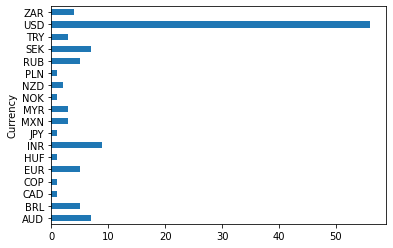

In [45]:
df_gb[['ISIN', 'Currency', 'USD Equivalent', 'Currency_Value', 'Local CCY']].groupby(['Currency']).size().plot(kind='barh')